In [2]:
import pandas as pd 
import numpy as np

In [3]:
# đọc file dữ liệu đầu vào (định dạng file csv) 
dt = pd.read_csv('E:\SoHoa\Adidas US Datasets.csv')

In [4]:
# xem 5 dòng dữ liệu đầu tiên
# xem 5 dòng dữ liệu cuối cùng có thể dùng câu lệnh dt.tail() 
dt.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,New York-New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,New York-New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,New York-New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,New York-New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,New York-New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [5]:
# kiểm tra kích thước của tệp dữ liệu 
dt.shape

(9648, 11)

ta thấy có tổng 9648 dòng và 11 cột trong tệp dữ liệu 

In [6]:
# xem thống kê của tệp dữ liệu 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Location Key      9648 non-null   object
 4   Product           9648 non-null   object
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   object
 7   Total Sales       9648 non-null   object
 8   Operating Profit  9648 non-null   object
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   object
dtypes: int64(1), object(10)
memory usage: 829.2+ KB


ta thấy chỉ có cột 'Retailer Id' là kiểu int64, các cột còn lại là object (string)
nhưng để có thể tính toán và trực quan hóa dữ liệu chúng ta cần chuyển đổi kiểu dữ liệu của các cột 
(Price per Unit, Units Sold, Total Sales,  Operating Profit) này thành kiểu int64 

để chắc chắn không ảnh hưởng đến tệp dữ liệu gốc ta sao chép tệp này ra và lưu vào một biến khác 
ta có thể dùng hàm df.copy()

In [7]:
df = dt.copy(deep=True)

tiếp theo đây, ta sẽ tiến hành xử lý cho các cột (Price per Unit, Units Sold, Total Sales,  Operating Profit) 

In [8]:
# đầu tiên là xử lý cột Price per Unit
df['Price per Unit'].unique()

array(['$50.00 ', '$40.00 ', '$45.00 ', '$60.00 ', '$55.00 ', '$65.00 ',
       '$70.00 ', '$25.00 ', '$35.00 ', '$30.00 ', '$80.00 ', '$75.00 ',
       '$20.00 ', '$85.00 ', '$100.00 ', '$90.00 ', '$95.00 ', '$15.00 ',
       '$10.00 ', '$110.00 ', '$105.00 ', '$47.00 ', '$36.00 ', '$41.00 ',
       '$46.00 ', '$44.00 ', '$58.00 ', '$48.00 ', '$39.00 ', '$43.00 ',
       '$59.00 ', '$56.00 ', '$49.00 ', '$54.00 ', '$64.00 ', '$53.00 ',
       '$61.00 ', '$62.00 ', '$68.00 ', '$52.00 ', '$66.00 ', '$51.00 ',
       '$24.00 ', '$34.00 ', '$33.00 ', '$23.00 ', '$32.00 ', '$38.00 ',
       '$29.00 ', '$37.00 ', '$27.00 ', '$42.00 ', '$72.00 ', '$63.00 ',
       '$69.00 ', '$76.00 ', '$67.00 ', '$57.00 ', '$28.00 ', '$18.00 ',
       '$19.00 ', '$71.00 ', '$78.00 ', '$73.00 ', '$74.00 ', '$83.00 ',
       '$82.00 ', '$98.00 ', '$77.00 ', '$88.00 ', '$86.00 ', '$14.00 ',
       '$9.00 ', '$97.00 ', '$81.00 ', '$79.00 ', '$96.00 ', '$84.00 ',
       '$89.00 ', '$103.00 ', '$101.00 ', '$87.00

In [9]:
df['Price per Unit'] = df['Price per Unit'].apply(lambda x: x.replace(',', ''))
df['Price per Unit'] = df['Price per Unit'].apply(lambda x: x.replace('$', ''))
df['Price per Unit'] = df['Price per Unit'].apply(lambda x: x.replace(' ', ''))
df['Price per Unit'] = df['Price per Unit'].apply(lambda x: x.replace('.00', ''))

In [10]:
# kiểm tra lại cột xem đã đúng như mong đợi chưa
df['Price per Unit']

0       50
1       50
2       40
3       45
4       60
        ..
9643    50
9644    41
9645    41
9646    42
9647    29
Name: Price per Unit, Length: 9648, dtype: object

In [11]:
# tiếp theo sẽ là chuyển đổi kiểu dữ liệu cho cột Price per Unit từ object thành int hoặc float
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Price per Unit']

0       50.0
1       50.0
2       40.0
3       45.0
4       60.0
        ... 
9643    50.0
9644    41.0
9645    41.0
9646    42.0
9647    29.0
Name: Price per Unit, Length: 9648, dtype: float64

In [12]:
# các cột còn lại ta cũng làm tương tự
df['Total Sales'] = df['Total Sales'].apply(lambda x: x.replace('$', ''))
df['Total Sales'] = df['Total Sales'].apply(lambda x: x.replace(',', ''))

In [13]:
df['Total Sales'] = df['Total Sales'].astype(float)
df['Total Sales']

0       600000.0
1       500000.0
2       400000.0
3       382500.0
4       540000.0
          ...   
9643      3200.0
9644      4305.0
9645      7544.0
9646      2940.0
9647      2407.0
Name: Total Sales, Length: 9648, dtype: float64

In [14]:
df['Operating Profit'] = df['Operating Profit'].apply(lambda x: x.replace('$', ''))
df['Operating Profit'] = df['Operating Profit'].apply(lambda x: x.replace(',', ''))
df['Operating Profit'] = df['Operating Profit'].astype(float)
df['Operating Profit']

0       300000.0
1       150000.0
2       140000.0
3       133875.0
4       162000.0
          ...   
9643       896.0
9644      1378.0
9645      2791.0
9646      1235.0
9647       650.0
Name: Operating Profit, Length: 9648, dtype: float64

In [15]:
df['Units Sold'] = df['Units Sold'].apply(lambda x: x.replace(',', ''))
df['Units Sold'] = df['Units Sold'].astype(float)
df['Units Sold']

0       1200.0
1       1000.0
2       1000.0
3        850.0
4        900.0
         ...  
9643      64.0
9644     105.0
9645     184.0
9646      70.0
9647      83.0
Name: Units Sold, Length: 9648, dtype: float64

In [16]:
# kiểm tra lại thông kê cho DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Location Key      9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price per Unit    9648 non-null   float64
 6   Units Sold        9648 non-null   float64
 7   Total Sales       9648 non-null   float64
 8   Operating Profit  9648 non-null   float64
 9   Operating Margin  9648 non-null   object 
 10  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 829.2+ KB


tiếp theo ta sẽ tiền hành trực quan hóa các dữ liệu

In [17]:
retailer = df['Retailer'].unique()
retailer

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [18]:
sale_by_retailer = {}
for item in retailer:
    rows = df[df['Retailer'] == item]
    total_sale = rows['Total Sales'].sum()
    sale_by_retailer[item] = total_sale
sale_by_retailer

{'Foot Locker': 220094720.0,
 'Walmart': 74558410.0,
 'Sports Direct': 182470997.0,
 'West Gear': 242964333.0,
 "Kohl's": 102114753.0,
 'Amazon': 77698912.0}

In [19]:
# thêm các thư viện vẽ biểu đồ
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
name_retailer = []
value_retailer = []
for item in sale_by_retailer:
    name = item 
    value = sale_by_retailer[item]
    name_retailer.append(name)
    value_retailer.append(value)

In [21]:
name_retailer

['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's", 'Amazon']

In [22]:
value_retailer

[220094720.0, 74558410.0, 182470997.0, 242964333.0, 102114753.0, 77698912.0]

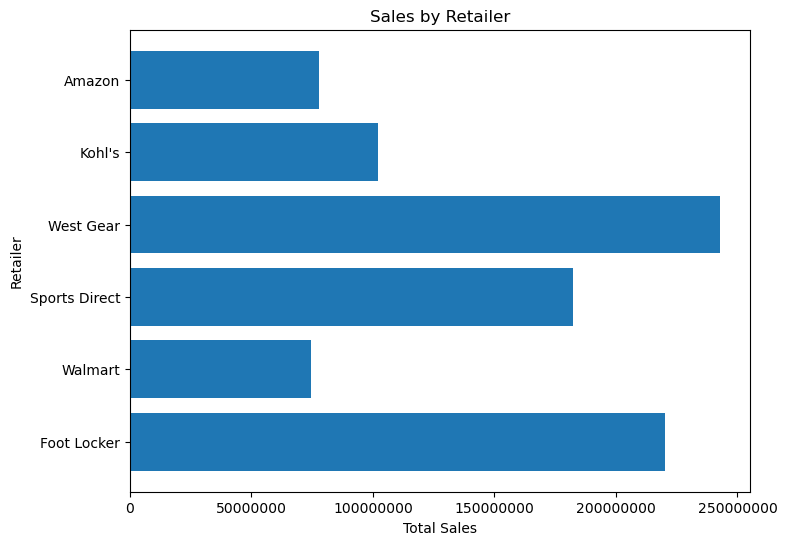

In [23]:
plt.figure(figsize=(8,6))
plt.barh(name_retailer, value_retailer)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Sales by Retailer')
plt.xlabel('Total Sales')
plt.ylabel('Retailer')
plt.show()

biểu đồ trên là tổng doanh thu cho cả 2 năm là 2020 và 2021

In [24]:
import datetime as dt 

ta chuyển đổi kiểu dữ liệu cho cột Invoice Date từ Object thành Datetime giúp xử lý dẽ dàng hơn với kiểu dữ liệu ngày tháng 

In [28]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Location Key      9648 non-null   object        
 4   Product           9648 non-null   object        
 5   Price per Unit    9648 non-null   float64       
 6   Units Sold        9648 non-null   float64       
 7   Total Sales       9648 non-null   float64       
 8   Operating Profit  9648 non-null   float64       
 9   Operating Margin  9648 non-null   object        
 10  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 829.2+ KB


ta đọc file 'Location Adidas US Datasets.csv' để nối với dataset hiện tại.
Do file 'Location Adidas US Datasets.csv' chứa dữ liệu liên quan đến khu vực nên ta cần phải nối chúng để có bộ dữ liệu đầy đủ hơn

đầu tiên ta cần đọc file dữ liệu 'Location Adidas US Datasets.csv'

In [30]:
df_loc = pd.read_csv("Location Adidas US Datasets.csv")

In [31]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       54 non-null     object
 1   State        54 non-null     object
 2   City         54 non-null     object
 3   LocationKey  54 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


ta sẽ tiến hành nối hai bảng 'Adidas US Datasets.csv' và 'Location Adidas US Datasets.csv' lại với nhau 

ta sẽ đổi tên cột giống nhau để nối hai bảng

In [46]:
df_loc.rename(columns={'LocationKey': 'Location Key'}, inplace = True)

In [47]:
df_loc.columns

Index(['Region', 'State', 'City', 'Location Key'], dtype='object')

ta thấy sau khi đổi tên cột thì cột 'Location Key' ở cả hai bảng đã giống hệt nhau

In [48]:
dfn = df.merge(df_loc, how='inner', on='Location Key')

In [49]:
dfn

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
0,Foot Locker,1185732,2020-01-01,New York-New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50%,In-store,Northeast,New York,New York
1,Foot Locker,1185732,2020-01-02,New York-New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30%,In-store,Northeast,New York,New York
2,Foot Locker,1185732,2020-01-03,New York-New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35%,In-store,Northeast,New York,New York
3,Foot Locker,1185732,2020-01-04,New York-New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35%,In-store,Northeast,New York,New York
4,Foot Locker,1185732,2020-01-05,New York-New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30%,In-store,Northeast,New York,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,New Hampshire-Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28%,Outlet,Northeast,New Hampshire,Manchester
9644,Foot Locker,1185732,2021-01-24,New Hampshire-Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32%,Outlet,Northeast,New Hampshire,Manchester
9645,Foot Locker,1185732,2021-02-22,New Hampshire-Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37%,Outlet,Northeast,New Hampshire,Manchester
9646,Foot Locker,1185732,2021-02-22,New Hampshire-Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42%,Outlet,Northeast,New Hampshire,Manchester


vì ta có 2 năm là 2020 và 2021 nên bây giờ ta sẽ tách hai năm riêng biệt để so sánh 

In [58]:
dfn_2020 = dfn[dfn['Invoice Date'].between('1/1/2020', '12/31/2020')]

In [59]:
dfn_2020

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
0,Foot Locker,1185732,2020-01-01,New York-New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50%,In-store,Northeast,New York,New York
1,Foot Locker,1185732,2020-01-02,New York-New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30%,In-store,Northeast,New York,New York
2,Foot Locker,1185732,2020-01-03,New York-New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35%,In-store,Northeast,New York,New York
3,Foot Locker,1185732,2020-01-04,New York-New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35%,In-store,Northeast,New York,New York
4,Foot Locker,1185732,2020-01-05,New York-New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30%,In-store,Northeast,New York,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Foot Locker,1185732,2020-12-27,Minnesota-Minneapolis,Women's Apparel,54.0,77.0,4158.0,2370.0,57%,Online,Midwest,Minnesota,Minneapolis
2228,Kohl's,1189833,2020-12-28,Minnesota-Minneapolis,Men's Street Footwear,32.0,119.0,3808.0,2209.0,58%,Online,Midwest,Minnesota,Minneapolis
2229,Kohl's,1189833,2020-12-29,Minnesota-Minneapolis,Men's Athletic Footwear,43.0,128.0,5504.0,2312.0,42%,Online,Midwest,Minnesota,Minneapolis
2230,Kohl's,1189833,2020-12-30,Minnesota-Minneapolis,Women's Street Footwear,41.0,119.0,4879.0,2879.0,59%,Online,Midwest,Minnesota,Minneapolis


In [60]:
dfn_2021 = dfn[dfn['Invoice Date'].between('1/1/2021', '12/31/2021')]

In [62]:
dfn_2021

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
453,West Gear,1128299,2021-01-01,California-San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,25%,Outlet,West,California,San Francisco
454,West Gear,1128299,2021-01-02,California-San Francisco,Women's Street Footwear,65.0,750.0,487500.0,195000.0,40%,Outlet,West,California,San Francisco
455,West Gear,1128299,2021-01-03,California-San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,136500.0,35%,Outlet,West,California,San Francisco
456,West Gear,1128299,2021-01-04,California-San Francisco,Men's Apparel,65.0,550.0,357500.0,196625.0,55%,Outlet,West,California,San Francisco
457,West Gear,1128299,2021-01-05,California-San Francisco,Women's Apparel,80.0,725.0,580000.0,116000.0,20%,Outlet,West,California,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,New Hampshire-Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28%,Outlet,Northeast,New Hampshire,Manchester
9644,Foot Locker,1185732,2021-01-24,New Hampshire-Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32%,Outlet,Northeast,New Hampshire,Manchester
9645,Foot Locker,1185732,2021-02-22,New Hampshire-Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37%,Outlet,Northeast,New Hampshire,Manchester
9646,Foot Locker,1185732,2021-02-22,New Hampshire-Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42%,Outlet,Northeast,New Hampshire,Manchester


In [168]:
percentage_2020 = dfn_2020.groupby(dfn_2020['Region']).sum()
percentage_2020['Total Sales']  = (percentage_2020['Total Sales'] / sum(dfn_2020['Total Sales'])) * 100
percentage_2020['Total Sales'] = percentage_2020['Total Sales'].apply(lambda x: float('%.2f' %x))
percentage_2020 = percentage_2020.reset_index()
percentage_2020

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10848\484647046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_2020 = dfn_2020.groupby(dfn_2020['Region']).sum()


,Region,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
0,Midwest,170778216,5957.0,20838.0,4.05,2670235.0
1,Northeast,273360084,11012.0,115011.0,22.38,14222804.0
2,South,257897112,8265.0,90322.0,13.98,9845140.0
3,Southeast,170745408,7317.0,73135.0,17.36,12168628.0
4,West,640204997,33369.0,163043.0,42.23,24468903.0


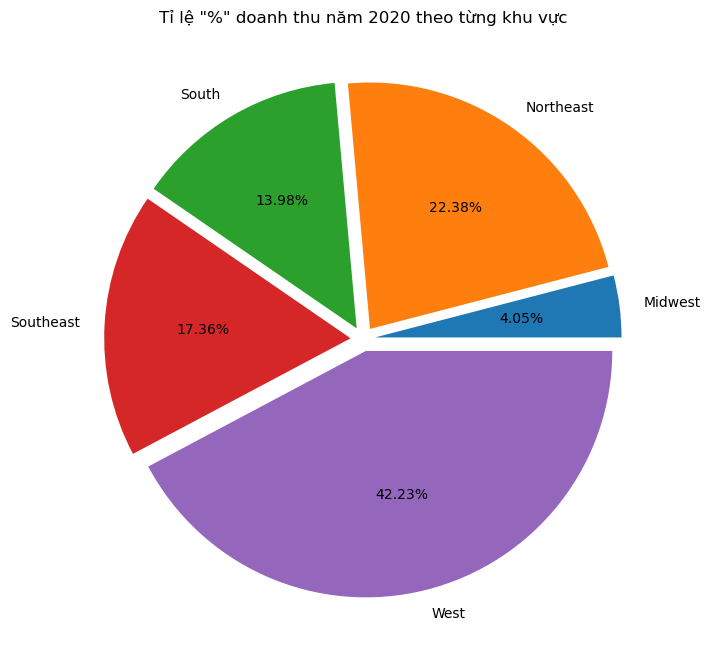

In [171]:
plt.figure(figsize=(8,8))
plt.pie(percentage_2020['Total Sales'], labels=percentage_2020['Region'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2020 theo từng khu vực')
plt.show()

In [166]:
percentage_2021 = dfn_2021.groupby(dfn_2021['Region']).sum()
percentage_2021['Total Sales']  = (percentage_2021['Total Sales'] / sum(dfn_2021['Total Sales'])) * 100
percentage_2021['Total Sales'] = percentage_2021['Total Sales'].apply(lambda x: float('%.2f' %x))
percentage_2021 = percentage_2021.reset_index()
percentage_2021

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10848\2579207540.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_2021 = dfn_2021.groupby(dfn_2021['Region']).sum()


,Region,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
0,Midwest,2051317482,69601.0,370499.0,17.89,50141177.0
1,Northeast,2542935676,99927.0,386268.0,20.28,53797884.0
2,South,1795256649,57808.0,401938.0,16.61,51292904.0
3,Southeast,1248026049,54107.0,333865.0,18.33,48386834.0
4,West,2174780460,88887.0,523942.0,26.89,65140613.0


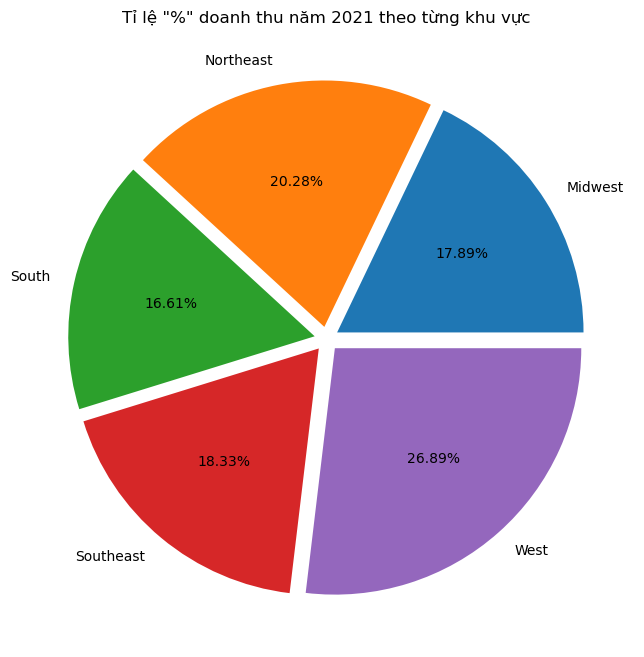

In [170]:
plt.figure(figsize=(8,8))
plt.pie(percentage_2021['Total Sales'], labels=percentage_2021['Region'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2021 theo từng khu vực')
plt.show()

tiếp theo ta sẽ so sánh doanh thu từng mục sản phẩm của năm 2020 và 2021

In [185]:
sale_by_product_20 = dfn_2020.groupby(dfn_2020['Product']).sum()
sale_by_product_20 = sale_by_product_20.reset_index()
sale_by_product_20 = sale_by_product_20.sort_values('Total Sales')
sale_by_product_20

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10848\2831448348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_by_product_20 = dfn_2020.groupby(dfn_2020['Product']).sum()


,Product,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
4,Women's Athletic Footwear,250990877,10203.0,64177.0,23629892.0,8290748.0
0,Men's Apparel,251040108,11825.0,61227.0,26216964.0,9660079.0
5,Women's Street Footwear,250990877,10138.0,75791.0,27426005.0,9203865.0
1,Men's Athletic Footwear,250990877,10793.0,81760.0,31794462.0,9359264.0
3,Women's Apparel,254597304,12502.0,80208.0,35190332.0,11302907.0
2,Men's Street Footwear,254375774,10459.0,99186.0,37823020.0,15558847.0


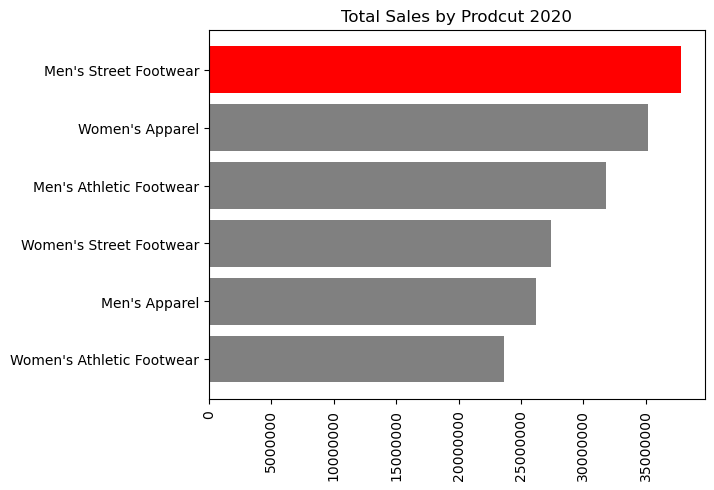

In [206]:
colors = ['r' if (bar == max(sale_by_product_20['Total Sales'])) else 'grey' for bar in sale_by_product_20['Total Sales']]
plt.barh(sale_by_product_20['Product'], sale_by_product_20['Total Sales'], color=colors)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Total Sales by Prodcut 2020')
plt.xticks(rotation=90)
plt.show()

In [207]:
sale_by_product_21 = dfn_2021.groupby(dfn_2021['Product']).sum()
sale_by_product_21 = sale_by_product_21.reset_index()
sale_by_product_21 = sale_by_product_21.sort_values('Total Sales')
sale_by_product_21

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10848\3357836910.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_by_product_21 = dfn_2021.groupby(dfn_2021['Product']).sum()


,Product,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
4,Women's Athletic Footwear,1634055000,55824.0,253059.0,83002004.0,30685095.0
0,Men's Apparel,1634214365,68992.0,245456.0,97511668.0,35103020.0
5,Women's Street Footwear,1636553429,54588.0,316478.0,100576808.0,35892032.0
1,Men's Athletic Footwear,1638924893,59692.0,353766.0,121879218.0,42487700.0
3,Women's Apparel,1633028633,70472.0,353619.0,143848528.0,57348089.0
2,Men's Street Footwear,1635539996,60762.0,494134.0,171003224.0,67243476.0


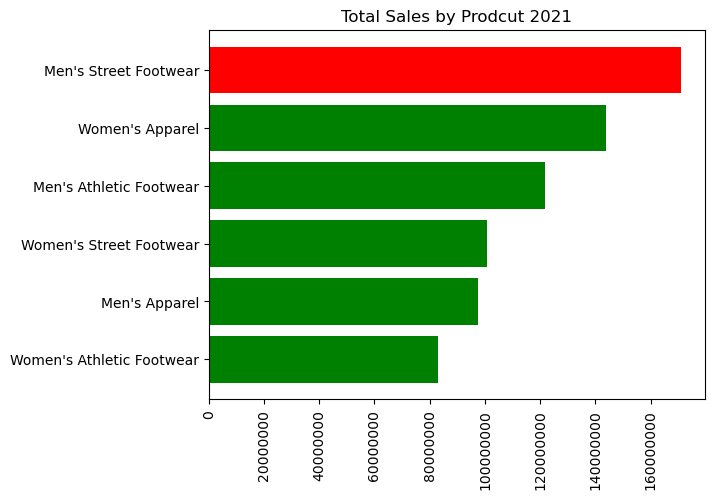

In [210]:
colors = ['r' if (bar == max(sale_by_product_21['Total Sales'])) else 'green' for bar in sale_by_product_21['Total Sales']]
plt.barh(sale_by_product_21['Product'], sale_by_product_21['Total Sales'], color=colors)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Total Sales by Prodcut 2021')
plt.xticks(rotation=90)
plt.show()